<a href="https://colab.research.google.com/github/sid19b/Major-project/blob/main/MajorProjectFinal_ipynb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install contractions --quiet
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet

     |████████████████████████████████| 286kB 10.2MB/s 
     |████████████████████████████████| 327kB 30.5MB/s 
     |████████████████████████████████| 7.8MB 6.2MB/s 
     |████████████████████████████████| 174kB 45.3MB/s 
     |████████████████████████████████| 112kB 56.4MB/s 
     |████████████████████████████████| 4.2MB 40.9MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 122kB 42.0MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [ ]:
#packages
import pandas as pd
import nltk
import requests
from bs4 import BeautifulSoup
import contractions
import re
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.pipeline import Pipeline
import joblib
from pyngrok import ngrok

In [ ]:
df= pd.read_csv('/content/IMDB Dataset.csv')
df=df.iloc[:1000,:]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
len(stopword_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


177

In [ ]:
#HTML tag
def html_tag(text):
  soup = BeautifulSoup(text,"html.parser")
  new_text = soup.get_text()
  return new_text
#Expand Contractions
def con(text):
  expand = contractions.fix(text)
  return expand
con("Y'all can't expand I'd think")
#Removing the special characters
def remove_sp(text):
  pattern = r'[^A-Za-z0-9\s]'
  text = re.sub(pattern,'',text)
  return text
#remove stopwords
tokenizer = ToktokTokenizer()

def remove_stopwords(text):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  filtered_tokens = [token for token in tokens if token not in stopword_list] 
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text


In [ ]:
df.review = df.review.apply(lambda x:x.lower())
df.review = df.review.apply(html_tag)
df.review = df.review.apply(con)
df.review = df.review.apply(remove_sp)
df.review = df.review.apply(remove_stopwords)

In [ ]:
df.head

<bound method NDFrame.head of                                                 review sentiment
0    one reviewers mentioned watching 1 oz episode ...  positive
1    wonderful little production filming technique ...  positive
2    thought wonderful way spend time hot summer we...  positive
3    basically family little boy jake thinks zombie...  negative
4    petter matteis love time money visually stunni...  positive
..                                                 ...       ...
994  watching film amazed media perception mould pe...  positive
995  nothing sacred ask ernie fosselius days everyb...  positive
996  hated hate selfaware pretentious inanity masqu...  negative
997  usually try professional constructive criticiz...  negative
998  like going see film history class something li...  negative

[999 rows x 2 columns]>

In [ ]:
x=df['review'].values
y=df['sentiment'].values


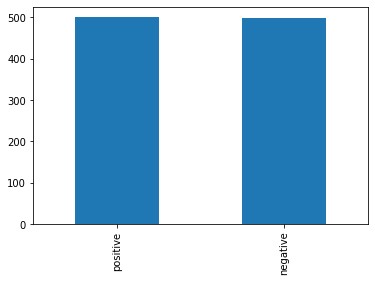

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(749,)
(250,)


In [ ]:
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [ ]:
model = SVC()
model.fit(x_train_v,y_train)
y_pred = model.predict(x_test_v)
y_pred

array(['positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positi

In [ ]:
accuracy_score(y_pred,y_test)

0.816

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 98,  16],
       [ 30, 106]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    negative       0.77      0.86      0.81       114
    positive       0.87      0.78      0.82       136

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



In [ ]:
# Evaluating for a specific message
text = df['review'][10]
print(text)
df['sentiment'][10]

phil alien one quirky films humour based around oddness everything rather actual punchlinesat first odd pretty funny movie progressed not find jokes oddness funny anymoreits low budget film never problem pretty interesting characters eventually lost interesti imagine film would appeal stoner currently partakingfor something similar better try brother another planet


'negative'

In [ ]:
text=vect.transform([text])
model.predict(text)

array(['negative'], dtype=object)

In [ ]:
text_model = Pipeline([('vect',TfidfVectorizer()),('model',SVC())])

In [ ]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', de

In [ ]:
y_pred=text_model.predict(x_test)

In [ ]:
# Evaluating for a specific message
text = df['review'][10]
text_model.predict([text])

array(['negative'], dtype=object)

In [ ]:
joblib.dump(text_model,'sentiment_analyzer')

['sentiment_analyzer']

In [ ]:
%%writefile app.py
import streamlit as st
import joblib 
model=joblib.load('sentiment_analyzer')
st.title('Sentiment Analyzer')
ip = st.text_input("Enter the Review")
op = model.predict([ip])
if st.button('Predict'):
  st.title(op[0])

Writing app.py


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
print(url)

nohup: appending output to 'nohup.out'
http://7cfc3e120fc3.ngrok.io


In [ ]:
import nltk
import sklearn

print('The nltk version is {}'.format(joblib.__version__))
print('The scikit-learn version is {}'.format(sklearn.__version__))


The nltk version is 1.0.1
The scikit-learn version is 0.22.2.post1
